# Part Two: Data Visualization

# Use jupyter Notebook to answer the following questions with the appropriate codes and post your project as ipynb file.

# 13. Import the necessary libraries

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from matplotlib.pyplot import rcParams

In [2]:
rcParams['figure.figsize'] = 10, 8

# 14. Import the dataset from file on blackboard

# 15. Assign your data to a variable MAC270

In [3]:
MAC270 = pd.read_table('chipotle.tsv')

# 16. Show the first 5 rows

In [4]:
MAC270.head(5)

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98


# 17.Create a histogram of the top 5 items bought

In [5]:
order = MAC270.groupby(['item_name'])['order_id'].count().reset_index(name = 'num_order')

In [6]:
num_bought = order.sort_values( 'num_order', ascending = False)

In [7]:
num_bought.head(5)

,item_name,num_order
17,Chicken Bowl,726
18,Chicken Burrito,553
25,Chips and Guacamole,479
39,Steak Burrito,368
10,Canned Soft Drink,301


In [8]:
y = num_bought['num_order'][:5]
x = num_bought['item_name'][:5]
color = ['darkcyan', 'coral', 'plum', 'powderblue', 'limegreen']

Text(0.5, 1.0, 'Top 5 items')

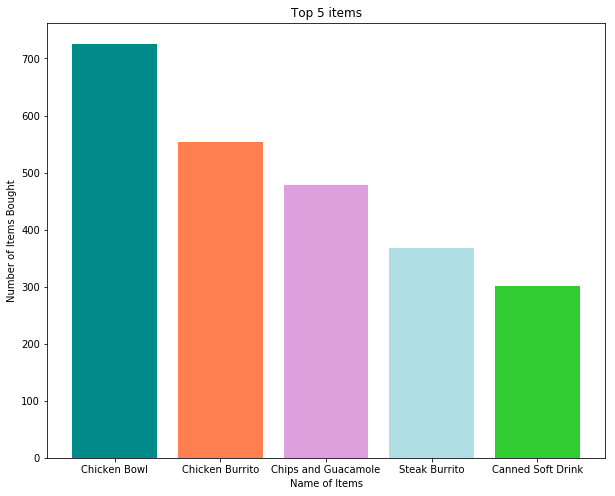

In [9]:
plt.bar(x, y, color = color)
plt.xlabel('Name of Items')
plt.ylabel('Number of Items Bought')
plt.title('Top 5 items')

# 18.Create a scatterplot with the number of items ordered per order price

In [10]:
MAC270.head()

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98


In [11]:
MAC270.dtypes #datatypes checking

order_id               int64
quantity               int64
item_name             object
choice_description    object
item_price            object
dtype: object

In [12]:
MAC270['item_price'] = MAC270['item_price'].str.replace('$', "") #removing the $ sign from item_price

In [13]:
MAC270['item_price'] = MAC270['item_price'].astype(float) #changing the datatype of item_price to float

In [14]:
MAC270['item_price'][:5]

0     2.39
1     3.39
2     3.39
3     2.39
4    16.98
Name: item_price, dtype: float64

In [15]:
description = MAC270.groupby(['item_price'])['item_price'].count().reset_index(name ="num_bought")

In [16]:
description.head()

,item_price,num_bought
0,1.09,106
1,1.25,264
2,1.50,117
3,1.69,99
4,1.99,1


Text(0.5, 1.0, 'Number of Items Ordered per Order Price')

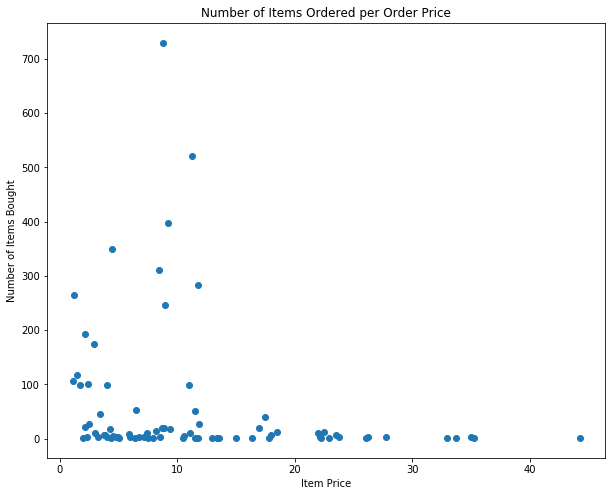

In [17]:
plt.scatter(description['item_price'],description['num_bought'])
plt.xlabel('Item Price')
plt.ylabel('Number of Items Bought')
plt.title('Number of Items Ordered per Order Price')

# Create a histogram of Top 5 items that has lowest price and find their median

In [18]:
order_price = MAC270.groupby(['item_name'])['item_price'].median().reset_index(name = 'median_price')

In [19]:
order_price = order_price.sort_values('median_price', ascending = True)

In [20]:
order_price.head()

,item_name,median_price
9,Canned Soda,1.09
10,Canned Soft Drink,1.25
6,Bottled Water,1.50
37,Side of Chips,1.69
23,Chips,2.15


In [21]:
a= order_price['median_price'][:5]
b= order_price['item_name'][:5]
color = ['darkcyan', 'coral', 'plum', 'powderblue', 'limegreen']

In [22]:
a

9     1.09
10    1.25
6     1.50
37    1.69
23    2.15
Name: median_price, dtype: float64

Text(0.5, 1.0, 'Top 5 lowest Priced Items')

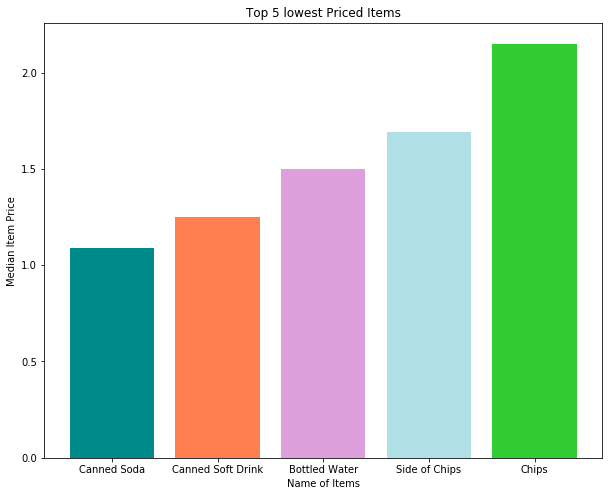

In [23]:
plt.bar(b, a, color = color)
plt.xlabel('Name of Items')
plt.ylabel('Median Item Price')
plt.title('Top 5 lowest Priced Items')